In [46]:
#cleaner imports

#importing folders from my drive and unzipping
from google.colab import drive
drive.mount('/content/gdrive')
#!unzip /content/gdrive/MyDrive/fish_data.zip

#python libraries import
import pandas as pd
%pylab inline 
import seaborn as sns
sns.set()

#sklearn libraries
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

#other libraries
from gensim.models.keyedvectors import KeyedVectors
from os import listdir
from os.path import isfile, join
import os
import skimage
from skimage import io
from IPython.display import SVG

# keras imports
import tensorflow as tf
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Lambda
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from keras.preprocessing.image import array_to_img
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

#flattening libraries
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pylab as plt
from numpy import array
from sys import getsizeof
import warnings
import PIL

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm', 'disp', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [48]:
#videos code: https://www.youtube.com/watch?v=chQNuV9B-Rw&ab_channel=KrishNaik
from glob import glob

img_size = [224,224]
img_height = 224
img_width = 224

train_path = '/content/gdrive/MyDrive/fish_train_val'

test_path = '/content/gdrive/MyDrive/fish_50_each'

folders = glob('/content/gdrive/MyDrive/fish_train_val')

In [49]:
#import inception NN
inception = InceptionV3(input_shape=img_size + [3], weights='imagenet',include_top=False)

#not training existing weights
for layer in inception.layers:
    layer.trainable = False

In [50]:
#import VGG-16 NN

from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_shape=img_size + [3],weights='imagenet' , include_top = False)

#not training existing weights
for layer in vgg_model.layers:
  layer.trainable = False

In [51]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [53]:
#my layers for VGG16 model
from tensorflow.keras.layers import BatchNormalization

x2 = Flatten()(vgg_model.output)

#put more layers

next_layer = Dense(4096, activation='relu')(x2)
next_layer2 = Dense(4096, activation='relu')(next_layer)
#then prediction layer change (x2) to (next_layer2)

#x2 = vgg_model.layers[-2].output

prediction2 = Dense(9, activation='softmax')(next_layer2)



model2 = Model(inputs=vgg_model.input, outputs=prediction2)

model2.save('model2')


In [54]:
#my layers for VGG16 model with Dense layers after, dropout layers, bacth normalization layers
from tensorflow.keras.layers import BatchNormalization

x2 = Flatten()(vgg_model.output)

#put more layers

next_layer = Dense(4096, activation='relu')(x2)

next_layer2 = Dropout(.5)(next_layer)

next_layer3 = Dense(4096, activation='relu')(next_layer2)

next_layer4 = BatchNormalization()(next_layer3)

prediction2 = Dense(9, activation='softmax')(next_layer4)



model2 = Model(inputs=vgg_model.input, outputs=prediction2)

model2.save('model2')


"\n\n#new layers\n#normalizing_layer = BatchNormalization()(x2)\n\nprev_model = load_model('model2')\n\nnew_model2 = Sequential()\nnew_model2.add(prev_model)\nnew_model2.add(BatchNormalization())\n"

In [56]:
model2.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

'\nnew_model2.summary()\n'

In [59]:
#compiling vgg model
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [ ]:
model2.summary()

In [61]:
#using imagedatagenerator

datagen = ImageDataGenerator(rescale = 1/255,
                             shear_range=.2,
                             zoom_range=.2
                             )

datagen_test = ImageDataGenerator(rescale= 1/255)

In [62]:
#splitting data into train, val, test: train 7208, val = 1802, test = 430 ... with original split

train_set = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/fish_train_val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')



test_set = datagen_test.flow_from_directory(
    '/content/gdrive/MyDrive/fish_50_each',
    target_size = (224,224),
    batch_size=32,
    class_mode='categorical')


Found 9010 images belonging to 9 classes.
Found 430 images belonging to 9 classes.


In [63]:
#splitting data into train, val, test: train 7208, val = 1802, test = 430 ... with new split

train_set2 = datagen.flow_from_directory(
    '/content/gdrive/MyDrive/fish_train_val_v2',
    target_size = (224,224),
    batch_size = 20,
    #batch_size=1,
    class_mode = 'categorical')



test_set2 = datagen_test.flow_from_directory(
    '/content/gdrive/MyDrive/fish_200_each',
    target_size = (224,224),
    batch_size=30,
    #batch_size=1,
    class_mode='categorical')

Found 7600 images belonging to 9 classes.
Found 1830 images belonging to 9 classes.


'\n#inception model fit\nr = model.fit_generator(train_set, \n                        validation_data=test_set,\n                        epochs=10,\n                        steps_per_epoch=len(train_set),\n                        validation_steps=len(test_set)\n                        )\n\n                        '

In [65]:

#vgg model fit with early stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("model2", monitor='val_acc', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto',
                             period=1)
#change patience to 3 or 2
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1, mode='auto')


                          

In [66]:
r2 = model2.fit_generator(train_set, 
                          validation_data=test_set,
                          epochs=20,
                          steps_per_epoch=len(train_set),
                          validation_steps=len(test_set),
                          #callbacks=[early]
                          )

#Epoch 15/20
#282/282 [==============================] - 197s 699ms/step - loss: 0.1123 - accuracy: 0.9655 - val_loss: 1.4711 - val_accuracy: 0.7767

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
282/282 [==============================] - 194s 684ms/step - loss: 1.3113 - accuracy: 0.7031 - val_loss: 2.3665 - val_accuracy: 0.5651
Epoch 2/20
282/282 [==============================] - 189s 668ms/step - loss: 0.3253 - accuracy: 0.8942 - val_loss: 1.7010 - val_accuracy: 0.6395
Epoch 3/20
282/282 [==============================] - 186s 660ms/step - loss: 0.2535 - accuracy: 0.9196 - val_loss: 2.8711 - val_accuracy: 0.5326
Epoch 4/20
282/282 [==============================] - 185s 656ms/step - loss: 0.2427 - accuracy: 0.9250 - val_loss: 3.3846 - val_accuracy: 0.5140
Epoch 5/20
282/282 [==============================] - 187s 664ms/step - loss: 0.1970 - accuracy: 0.9396 - val_loss: 2.0477 - val_accuracy: 0.6279
Epoch 6/20
282/282 [==============================] - 200s 710ms/step - loss: 0.2158 - accuracy: 0.9370 - val_loss: 1.5141 - val_accuracy: 0.7000
Epoch 7/20
282/282 [==============================] - 191s 678ms/step - loss: 0.1732 - accuracy: 0.9486 - val_loss: 0.9237 -

In [67]:
#for the graphs, so this is a history object
r2_for_plots = model2.fit_generator(train_set2, 
                          validation_data=test_set2,
                          epochs=20,
                          steps_per_epoch=len(train_set2),
                          validation_steps=len(test_set2),
                          #callbacks=[early]
                          )


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
380/380 [==============================] - 219s 578ms/step - loss: 0.2148 - accuracy: 0.9463 - val_loss: 0.4348 - val_accuracy: 0.9251
Epoch 2/20
380/380 [==============================] - 219s 576ms/step - loss: 0.1473 - accuracy: 0.9611 - val_loss: 0.4693 - val_accuracy: 0.9246
Epoch 3/20
380/380 [==============================] - 218s 574ms/step - loss: 0.1508 - accuracy: 0.9593 - val_loss: 0.4904 - val_accuracy: 0.9115
Epoch 4/20
380/380 [==============================] - 217s 571ms/step - loss: 0.0891 - accuracy: 0.9754 - val_loss: 0.5291 - val_accuracy: 0.9295
Epoch 5/20
380/380 [==============================] - 214s 563ms/step - loss: 0.1112 - accuracy: 0.9679 - val_loss: 0.6048 - val_accuracy: 0.9158
Epoch 6/20
380/380 [==============================] - 214s 562ms/step - loss: 0.1290 - accuracy: 0.9625 - val_loss: 0.5244 - val_accuracy: 0.9115
Epoch 7/20
380/380 [==============================] - 215s 565ms/step - loss: 0.0853 - accuracy: 0.9750 - val_loss: 0.4469 -

In [68]:
r2_new_split = model2

r2_new_split.fit_generator(train_set2, 
                          validation_data=test_set2,
                          epochs=10,
                          steps_per_epoch=len(train_set2),
                          validation_steps=len(test_set2),
                          #callbacks=[early]
                          )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
380/380 [==============================] - 223s 586ms/step - loss: 0.0455 - accuracy: 0.9875 - val_loss: 0.3513 - val_accuracy: 0.9344
Epoch 2/10
380/380 [==============================] - 221s 582ms/step - loss: 0.0683 - accuracy: 0.9791 - val_loss: 0.2727 - val_accuracy: 0.9519
Epoch 3/10
380/380 [==============================] - 219s 576ms/step - loss: 0.0478 - accuracy: 0.9867 - val_loss: 0.4003 - val_accuracy: 0.9306
Epoch 4/10
380/380 [==============================] - 214s 564ms/step - loss: 0.0499 - accuracy: 0.9853 - val_loss: 0.3058 - val_accuracy: 0.9355
Epoch 5/10
380/380 [==============================] - 213s 562ms/step - loss: 0.0791 - accuracy: 0.9787 - val_loss: 0.3889 - val_accuracy: 0.9208
Epoch 6/10
380/380 [==============================] - 215s 565ms/step - loss: 0.0702 - accuracy: 0.9784 - val_loss: 0.2181 - val_accuracy: 0.9470
Epoch 7/10
380/380 [==============================] - 214s 564ms/step - loss: 0.0623 - accuracy: 0.9807 - val_loss: 0.3132 -

In [69]:
len(train_set)

282

'\n#vgg model fit\nr2 = model2.fit_generator(train_set, \n                        validation_data=test_set,\n                        epochs=20,\n                        steps_per_epoch=len(train_set),\n                        validation_steps=len(test_set)\n                        )\n\n                        '

"\n#inception v3 plots\n# plot the loss\nplt.plot(r.history['loss'], label='train loss')\nplt.plot(r.history['val_loss'], label='val loss')\nplt.legend()\nplt.show()\nplt.savefig('IV3_LossVal_loss')\n\n# plot the accuracy\nplt.plot(r.history['accuracy'], label='train acc')\nplt.plot(r.history['val_accuracy'], label='val acc')\nplt.legend()\nplt.show()\nplt.savefig('IV3_AccVal_acc')\n\n\n#at epochs=5, training loss is level, val loss is at a local minimum, 5 epochs may be ideal\n#at epochs=5, val acc is at local max, train acc is level, 5 epochs may be ideal\n"

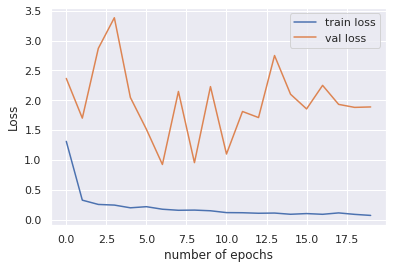

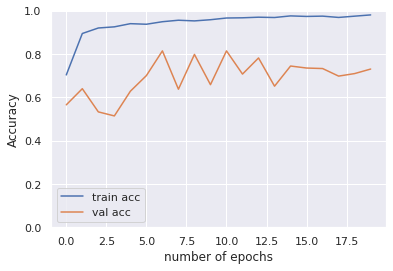

In [72]:
#vgg16 plots

# plot the loss
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.xlabel('number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('TL_loss_old_split')
plt.show()


# plot the accuracy
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend()
plt.savefig('TL_acc_old_split')
plt.show()


#epochs = 12 minimizes loss and maximizes accuracy

In [73]:
#it seems like .9855 accuracy for inception v3 and .9999 accuracy for vgg16


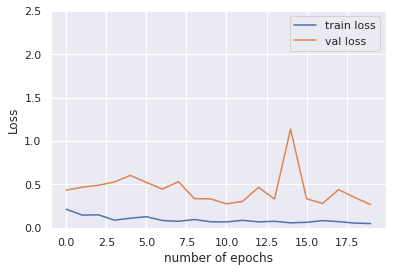

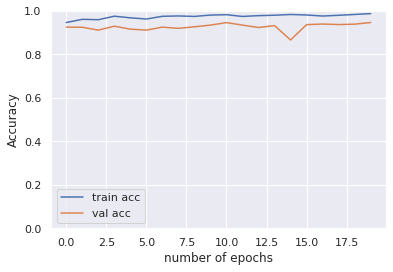

In [83]:
#vgg16 plots new split

# plot the loss
plt.plot(r2_for_plots.history['loss'], label='train loss')
plt.plot(r2_for_plots.history['val_loss'], label='val loss')
plt.xlabel('number of epochs')
plt.ylabel('Loss')
plt.yticks([0.0, 0.5, 1.0, 1.5, 2.0,2.5])
plt.legend()
plt.savefig('TL_loss_new_split')
plt.show()


# plot the accuracy
plt.plot(r2_for_plots.history['accuracy'], label='train acc')
plt.plot(r2_for_plots.history['val_accuracy'], label='val acc')
plt.xlabel('number of epochs')
plt.ylabel('Accuracy')
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.legend()
plt.savefig('TL_acc_new_split')
plt.show()




In [76]:
type(r2_new_split)

keras.engine.functional.Functional

In [77]:

#trying to plot a confusion matrix 

from sklearn.metrics import confusion_matrix
import itertools


#model_variable = r2_new_split

#predictions = r2_new_split.predict(test_set2)
#predictions

num_of_test_samples = 1830
batch_size = 30

Y_pred = r2_new_split.predict(test_set2, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


cm = confusion_matrix(y_true = test_set2.classes, y_pred=y_pred, labels=test_set2.classes)



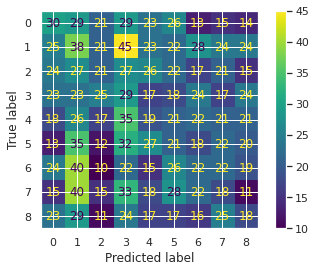

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(test_set2.classes, y_pred)

#disp.plot()

plt.show()

1830
1830


keras.preprocessing.image.DirectoryIterator

KeyboardInterrupt: ignored